In [51]:
import requests
import os
import re
import sqlite3
import pandas as pd
from IPython.display import display, HTML
import datetime
import matplotlib.pyplot
import matplotlib.dates 


## download database

In [3]:
url = 'https://dev.rasal.de/Heizungsmessung/store/assets/db.sqlite'
r = requests.get(url, allow_redirects=True)
open('db.sqlite', 'wb').write(r.content)

172032

## read database

In [38]:
con = sqlite3.connect('db.sqlite')
# cur = con.cursor()
# for row in cur.execute('SELECT * FROM haus_one;'):
    # print(row)
# con.close()

## the pandas way:
df_SQLite = pd.read_sql_query("SELECT * from haus_one", con)
con.close()

print(df_SQLite.head())


   id                 date temp_1 temp_2 hum_1 hum_2
0   1  2022-10-25 00:00:00   None     40     2     3
1   2  2022-10-25 00:03:00   None     40     2     3
2   3  2022-10-25 00:06:00      9   None     2     3
3   4  2022-10-25 00:09:00      9   None     2     3
4   5  2022-10-25 00:12:00   None     40     2     3


## resample data

In [48]:
## get the data from the SQLIte dataframe
df = df_SQLite
## make datetime index
df.index = pd.to_datetime(df['date'])
## remove some columns
df = df.drop('date', axis=1)
df = df.drop('id', axis=1)
## print original data
print(df)

## upsample to 1 minute
upsampled = df.resample('1Min').mean()
print(upsampled)
## interpolate values
interpolated = upsampled.interpolate(method='linear')
print(interpolated)


                    temp_1 temp_2 hum_1 hum_2
date                                         
2022-10-25 00:00:00   None     40     2     3
2022-10-25 00:03:00   None     40     2     3
2022-10-25 00:06:00      9   None     2     3
2022-10-25 00:09:00      9   None     2     3
2022-10-25 00:12:00   None     40     2     3
...                    ...    ...   ...   ...
2022-10-29 23:45:00     29   None     2     3
2022-10-29 23:48:00     29   None     2     3
2022-10-29 23:51:00     29   None     2     3
2022-10-29 23:54:00     29   None     2     3
2022-10-29 23:57:00   None     14     2     3

[2200 rows x 4 columns]
                     temp_1  temp_2  hum_1  hum_2
date                                             
2022-10-25 00:00:00     NaN    40.0    2.0    3.0
2022-10-25 00:01:00     NaN     NaN    NaN    NaN
2022-10-25 00:02:00     NaN     NaN    NaN    NaN
2022-10-25 00:03:00     NaN    40.0    2.0    3.0
2022-10-25 00:04:00     NaN     NaN    NaN    NaN
...                     ...

## plot

<AxesSubplot: xlabel='date'>

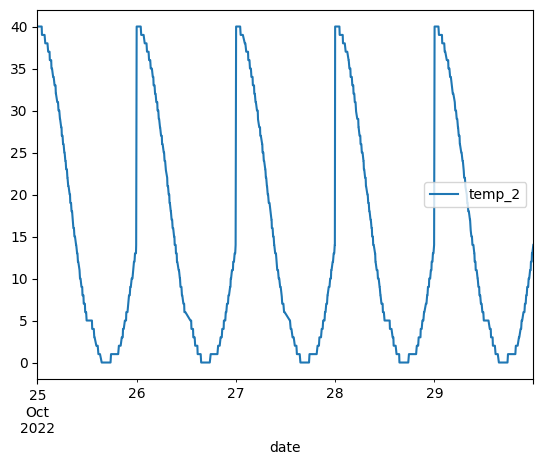

In [56]:
interpolated.plot( y='temp_2', kind='line')
